Using TensorFlow backend.


importing Jupyter notebook from resnet_utils.ipynb
importing Jupyter notebook from ../../../notebooks_src/models/configs.ipynb
importing Jupyter notebook from ../../../notebooks_src/config_util.ipynb
importing Jupyter notebook from ../../../notebooks_src/load_data/configs.ipynb


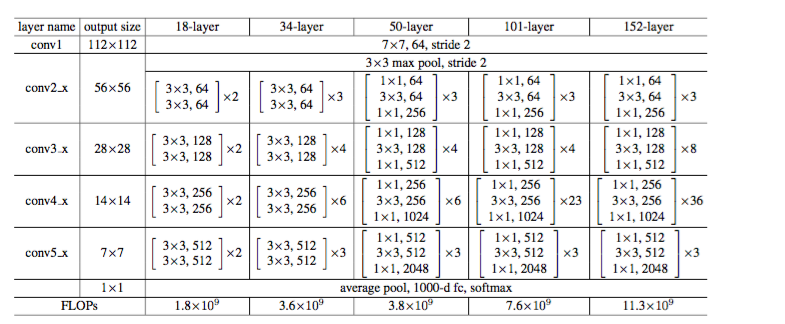

In [1]:
import sys
from nbfinder import NotebookFinder
sys.meta_path.append(NotebookFinder())
import keras
from keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D,\
Flatten, ZeroPadding2D, AveragePooling2D, Dense, GlobalAveragePooling2D, GlobalMaxPooling2D, Input
from resnet_utils import conv_block, identity_block
if __name__ == "__main__":
    sys.path.append("../../../") 
from notebooks_src.configs import configs
# from IPython.display import Image
# Image(filename='./../resnet_table.png') 

In [2]:

def ResNet101(inp_shape):
    layers = {}
    img_input = Input(shape=inp_shape)
    bn_axis = 3

    layers["input"] = img_input

    x = Conv2D(64, (7, 7), strides=(2, 2), padding='valid',name='conv1')(img_input)
    x = BatchNormalization(axis=bn_axis, name='bn_conv1')(x)
    x = Activation('relu')(x)
    layers["conv1"] = x

    x = MaxPooling2D((3, 3), strides=(2, 2),padding="valid")(x)
    
    
    x = conv_block(x, 3, [64, 64, 256], stage=2, block='a', strides=(1, 1))
    x = identity_block(x, 3, [64, 64, 256], stage=2, block='b')
    x = identity_block(x, 3, [64, 64, 256], stage=2, block='c')
    layers["conv2_x"] = x


    x = conv_block(x, 3, [128, 128, 512], stage=3, block='a', strides=(2,2))
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='b')
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='c')
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='d')
    layers["conv3_x"] = x

    
    x = conv_block(x, 3, [256, 256, 1024], stage=4, block='a',strides=(2,2))
    block = 'b'
    for i in range(22):
        x = identity_block(x, 3, [256, 256, 1024], stage=4, block=block)
        #increment letter
        block = chr(ord(block) + 1)

    layers["conv4_x"] = x

    x = conv_block(x, 3, [512, 512, 2048], stage=5, block='a', strides=(2,2))
    x = identity_block(x, 3, [512, 512, 2048], stage=5, block='b')
    x = identity_block(x, 3, [512, 512, 2048], stage=5, block='c')
    layers["conv5_x"] = x
    layers["last"] = x
    return layers

def get_base_layers(inp_shape=None):
    if inp_shape is None:
        inp_shape = configs["tensor_input_shape"]
    #returns a dictionary mapping the local receptive field size to a layer for all relevant layers
    layers_dict = ResNet101(inp_shape)
    # add one b/c for n layers we want 0th layer up to and including nth layer (1st layer is 2^1 lrf, nth is 2^n)
    return layers_dict